In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from typing import List

## 3a Voting Classifier

Tworzenie oraz podział danych

In [10]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Tworzenie klasyfikatorów i ich łączenie

In [11]:
svm_clf = SVC()
log_reg_clf = LogisticRegression()
rf_clf = RandomForestClassifier()

voting_clf = VotingClassifier([("svm", svm_clf), ("log_reg", log_reg_clf), ("rf", rf_clf)])

Trenowanie Voting Classifier

In [12]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC()), ('log_reg', LogisticRegression()),
                             ('rf', RandomForestClassifier())])

Ocena jakości

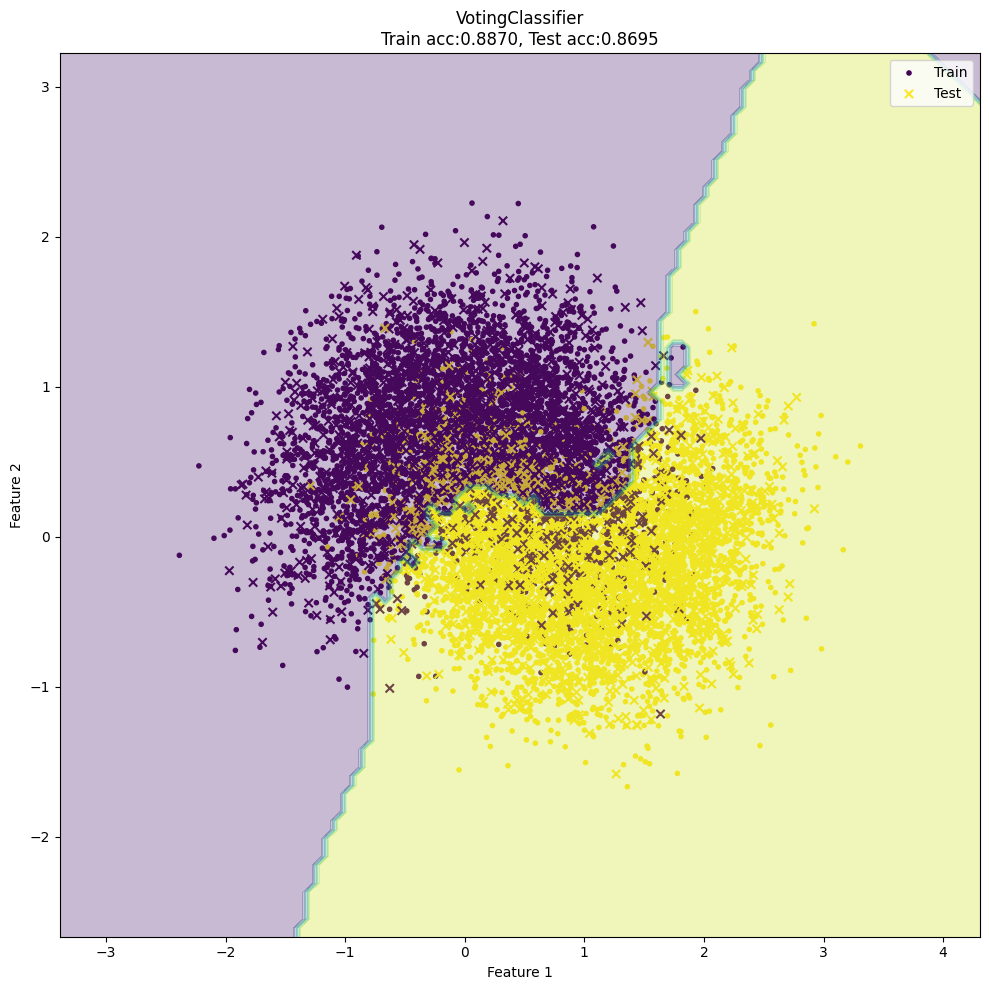

In [13]:
train_accuracy = accuracy_score(y_train, voting_clf.predict(X_train))   # Oblicza dokładność modelu na danych treningowych.
test_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))  # Oblicza dokładność modelu na danych testowych.

plt.figure(figsize=(10, 10))  # Ustawia rozmiar wykresu.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.', label='Train')  # Rysuje punkty danych treningowych.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')  # Rysuje punkty danych testowych.
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),  # Tworzy siatkę dla wykresu konturu decyzji.
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = voting_clf.predict(np.c_[xx.ravel(), yy.ravel()])  # Dokonuje predykcji na całej siatce.
Z = Z.reshape(xx.shape)  # type: ignore # Przekształca wynik predykcji do oryginalnego kształtu siatki.
plt.contourf(xx, yy, Z, alpha=0.3)  # Rysuje kontur decyzji na podstawie predykcji VotingClassifier.
plt.xlabel('Feature 1')  # Ustawia etykietę osi x.
plt.ylabel('Feature 2')  # Ustawia etykietę osi y.
plt.title(f"VotingClassifier\nTrain acc:{train_accuracy:.4f}, Test acc:{test_accuracy:.4f}")  # Ustawia tytuł wykresu.
plt.legend()  # Dodaje legendę.
plt.tight_layout()  # Dostosowuje wygląd wykresu.
plt.show()  # Wyświetla wykres.

## 3b Polynomial Model and Liniear Regression

In [17]:
def second_part(data_file_path: str):
    with open(data_file_path, "r") as file:
        data = file.readlines()

# Przetwarzanie danych do postaci potrzebnej do dopasowania modelu
    x_data: List[float] = []
    y_data: List[float] = []

    for line in data:
        x, y = map(float, line.split())  # Zakładamy, że dane są oddzielone spacją
        x_data.append(x)
        y_data.append(y)

# Podział danych na dane treningowe i testowe
    x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

# Dopasowanie modelu liniowego do danych treningowych
    X_train = np.array(x_train).reshape(
    -1, 1
)  # Przekształcamy x_train do postaci kolumnowej
    Y_train = np.array(y_train)

# Użycie modelu LinearRegression
    model = LinearRegression(n_jobs=-1)
    model.fit(X_train, Y_train)
    a: float = model.coef_[0]
    b = model.intercept_

# Ocena modelu na danych testowych
    X_test: np.ndarray = np.array(x_test).reshape(-1, 1)
    Y_test: np.ndarray = np.array(y_test)
    y_pred: np.ndarray = model.predict(X_test)
    precision = r2_score(Y_test, y_pred)  # r2_score

# Model wielomianowy stopnia 2
    poly_features = PolynomialFeatures(degree=2)
    X_train_poly: np.ndarray = poly_features.fit_transform(X_train)
    model_poly = LinearRegression(n_jobs=-1)
    model_poly.fit(X_train_poly, Y_train)

# Ocena modelu wielomianowego na danych testowych
    X_test_poly = poly_features.transform(X_test)
    y_pred_poly: np.ndarray = model_poly.predict(X_test_poly)
    precision_poly = r2_score(Y_test, y_pred_poly)  # r2_score

# Wykres przentujący punkty z danych i dopasowane modele
    plt.scatter(x_train, y_train, color="blue", label="Dane treningowe")
    plt.scatter(x_test, y_test, color="green", label="Dane testowe")
    x_range = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
    plt.plot(
    x_range,
    model.predict(x_range),
    color="red",
    label=f"y = {a:.2f}x + {b:.2f}, r^2={precision:.2f}",
)
    plt.plot(
    x_range,
    model_poly.predict(poly_features.transform(x_range)),
    color="orange",
    label=f"y = {model_poly.intercept_:.2f} + {model_poly.coef_[1]:.2f}x + {model_poly.coef_[2]:.2f}x^2, r^2={precision_poly:.2f}",
)
    plt.xlabel("Wartość X")
    plt.ylabel("Wartość Y")
    plt.title("Porównanie modeli")
    plt.legend()
    plt.show()

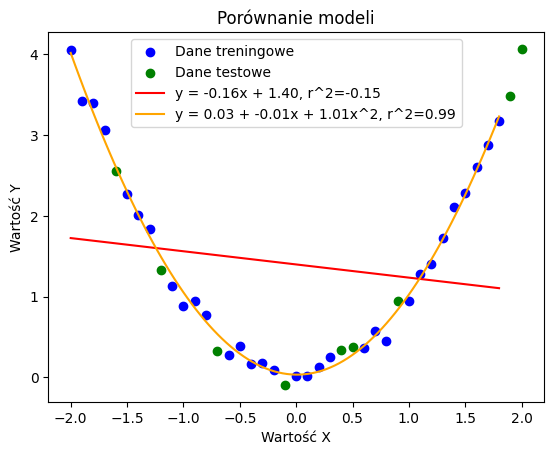

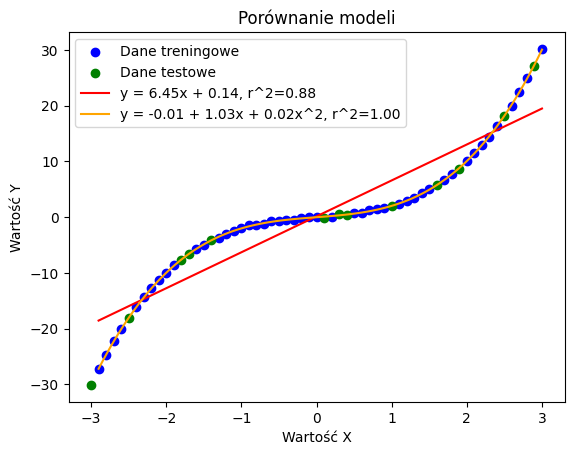

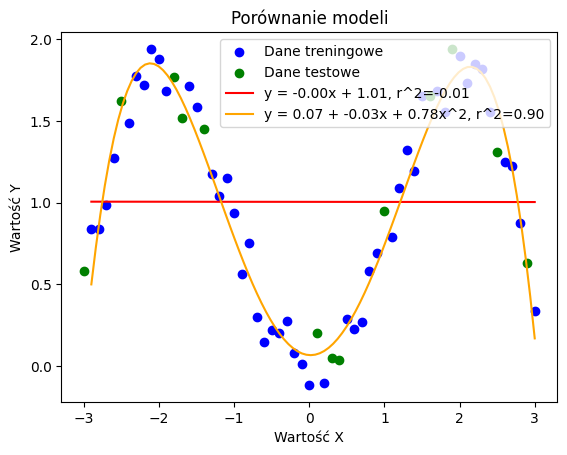

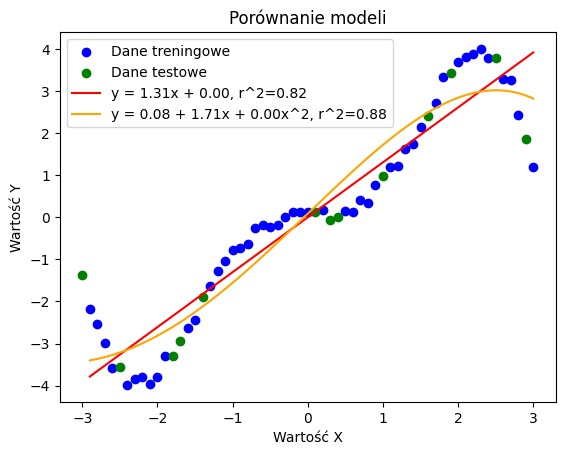

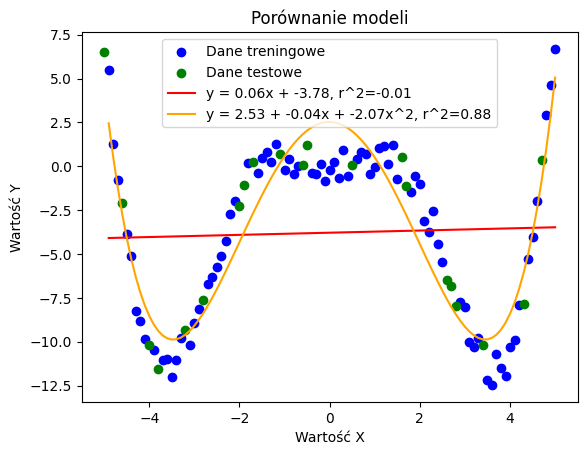

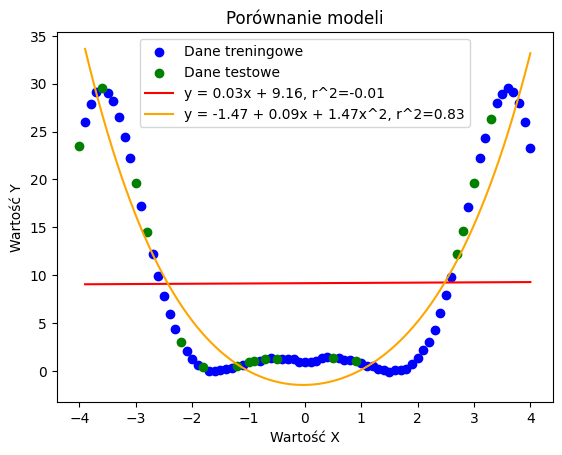

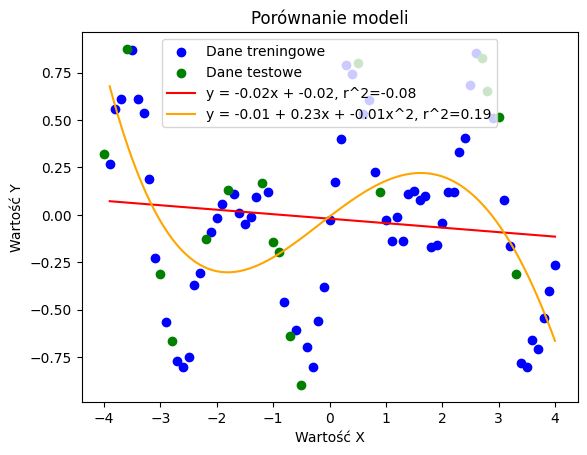

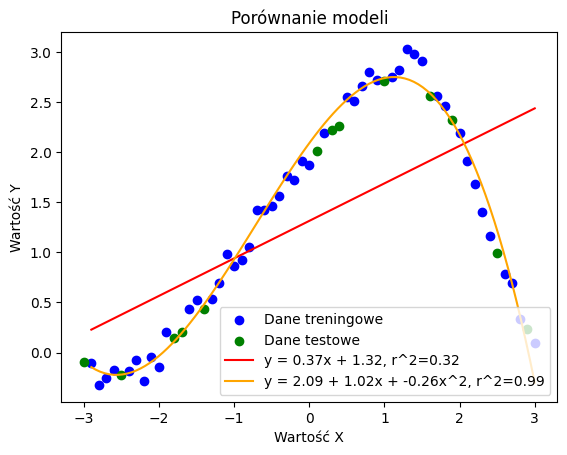

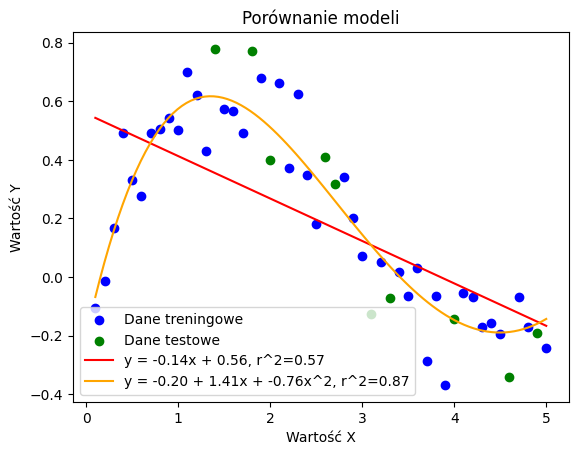

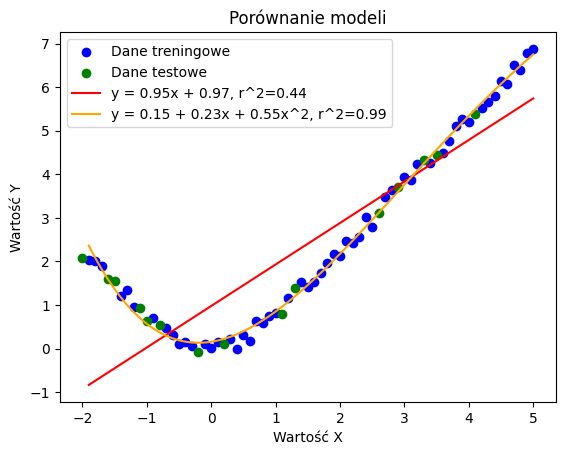

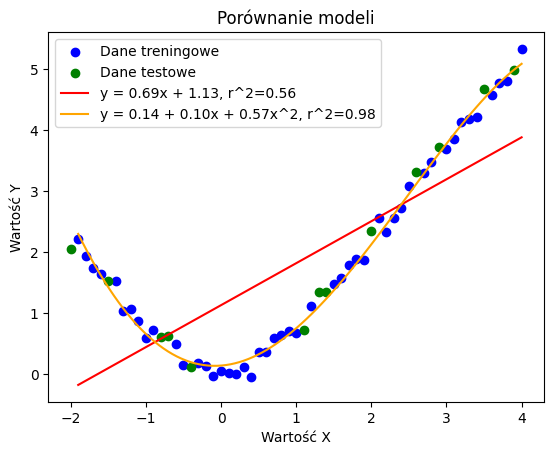

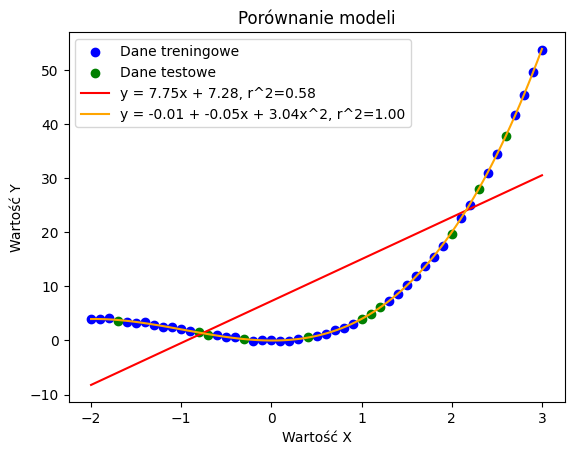

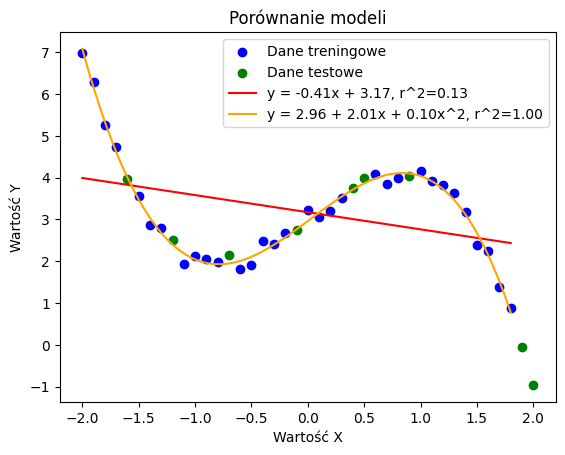

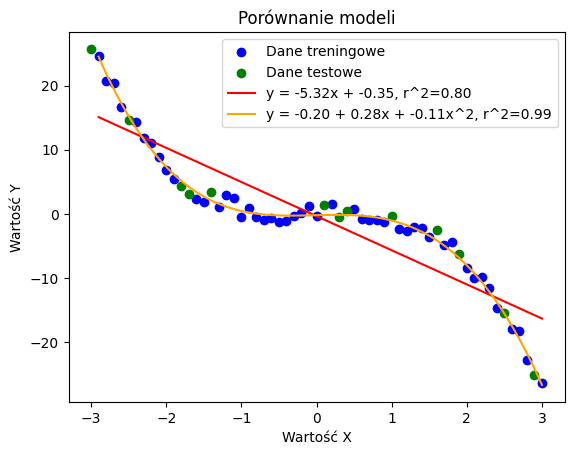

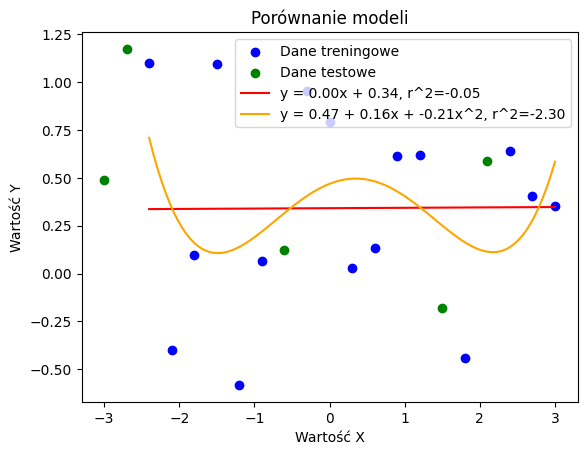

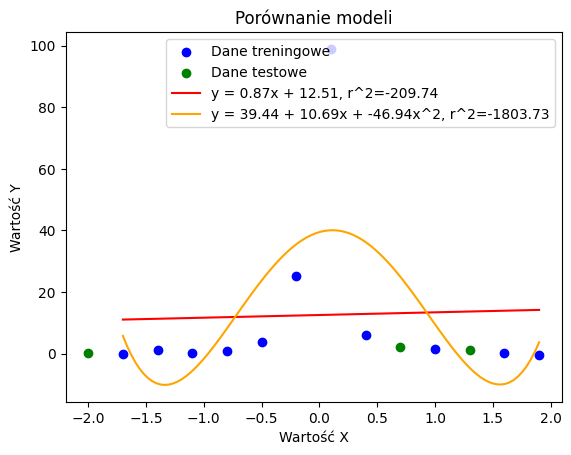

In [22]:
for i in range(1, 17):
    second_part(f"Dane/dane{i}.txt")